In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 

In [2]:
# Load the data
data = pd.read_csv("C:\\Users\\aksha\\PERSONAL\\DATA_ANALYTICS\\STATI\\Diabetes Dataset.csv")##

In [3]:
#Exploratory Data Analysis

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB
None


In [7]:
#look at the first few rows of the data
data.head(10)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
2,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,634,34224,F,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,N
4,721,34225,F,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,N
5,759,34230,F,32,3.6,28,4.0,3.8,2.0,2.4,3.8,1.0,24.0,N
6,636,34231,F,31,4.4,55,4.2,3.6,0.7,1.7,1.6,0.3,23.0,N
7,788,34232,F,33,3.3,53,4.0,4.0,1.1,0.9,2.7,1.0,21.0,N
8,82,46815,F,30,3.0,42,4.1,4.9,1.3,1.2,3.2,0.5,22.0,N
9,132,34234,F,45,4.6,54,5.1,4.2,1.7,1.2,2.2,0.8,23.0,N


In [4]:
# check for missing values
print(data.isnull().sum())

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64


In [5]:
print(data.columns) 

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')


In [8]:
#trying dropping ID and No_Pation columns as they dont seem useful
data.drop(['ID','No_Pation'], axis=1, inplace=True) 

In [9]:
#print the number of rows and columns
print(data.shape) 

(1000, 12)


In [10]:
#look at descriptive statistics of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,1000.0,53.528000,8.799241,20.0,51.0,55.0,59.0,79.00
Urea,1000.0,5.124743,2.935165,0.5,3.7,4.6,5.7,38.90
Cr,1000.0,68.943000,59.984747,6.0,48.0,60.0,73.0,800.00
HbA1c,1000.0,8.281160,2.534003,0.9,6.5,8.0,10.2,16.00
Chol,1000.0,4.862820,1.301738,0.0,4.0,4.8,5.6,10.30
TG,1000.0,2.349610,1.401176,0.3,1.5,2.0,2.9,13.80
HDL,1000.0,1.204750,0.660414,0.2,0.9,1.1,1.3,9.90
LDL,1000.0,2.609790,1.115102,0.3,1.8,2.5,3.3,9.90
VLDL,1000.0,1.854700,3.663599,0.1,0.7,0.9,1.5,35.00
BMI,1000.0,29.578020,4.962388,19.0,26.0,30.0,33.0,47.75


In [29]:
#VISUALISATION OF THE DATA

import seaborn as sns
import warnings
import itertools
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


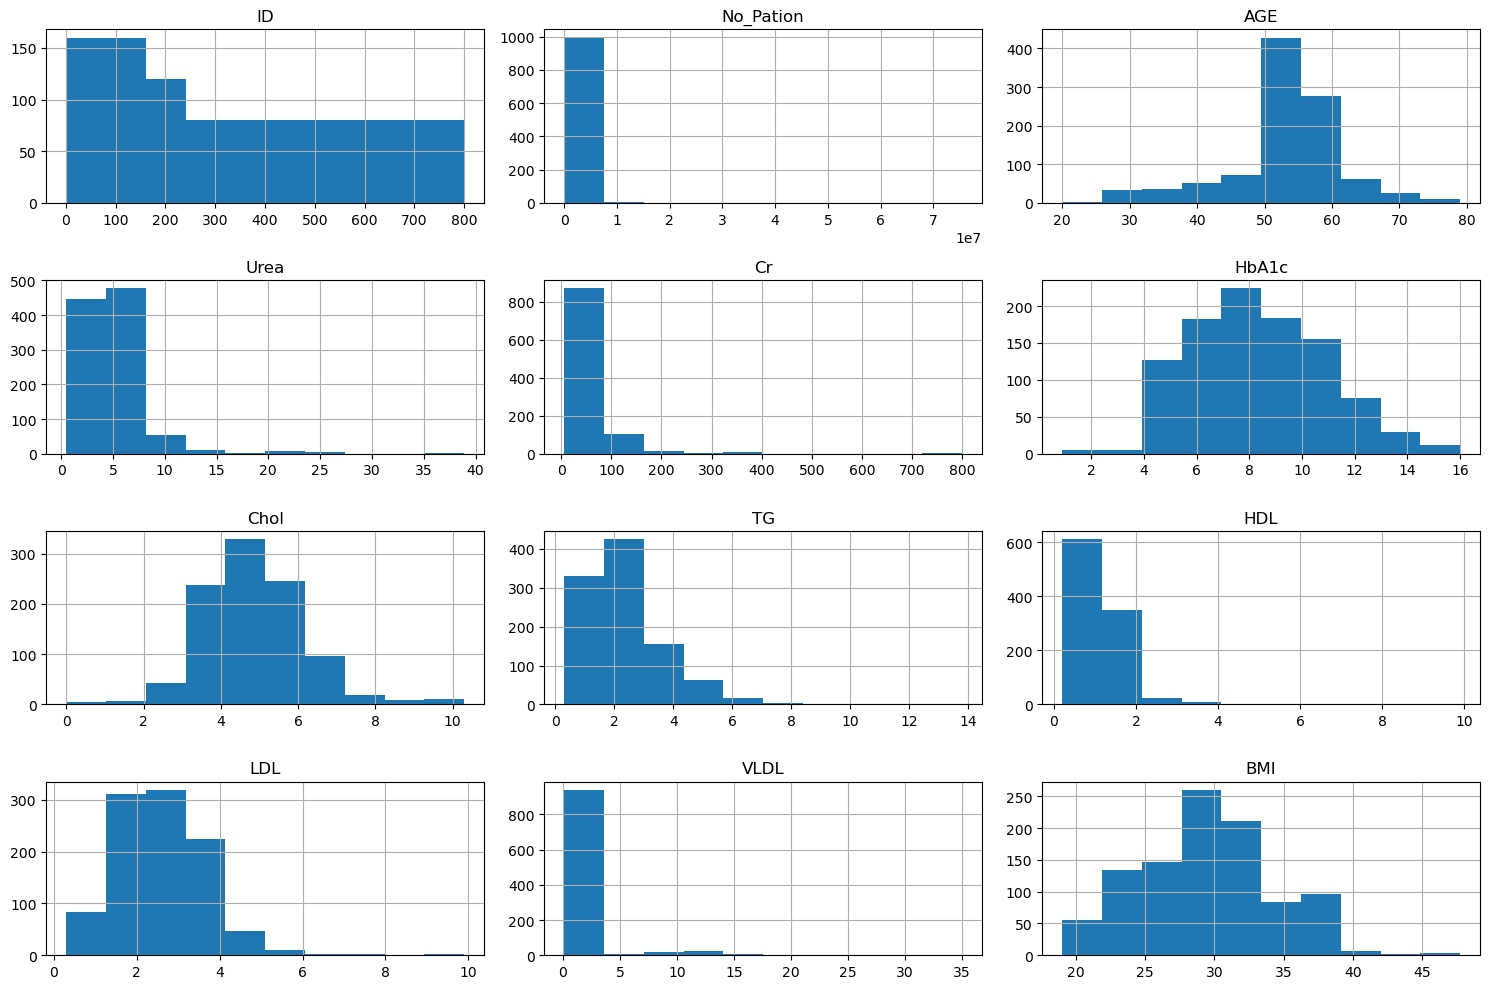

In [28]:
# plot histogram of all columns

df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()


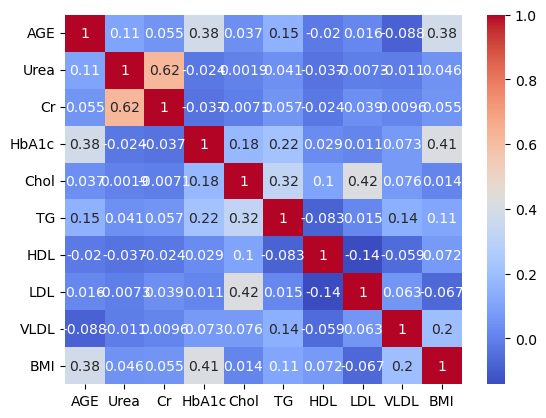

In [14]:
#explore the correlation between the features
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show() 

In [16]:
#DATA TRANSFORMATION AND PRE PROCESSING

#encoding categorical columns
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data['Gender'].value_counts()

1    565
0    435
Name: Gender, dtype: int64

In [17]:
#ignoring and removing temporarily the diabetes class=P, before fitting the model
pre_data = data[data['CLASS']=='P']
pre_data.reset_index(inplace=True)
pre_data.drop(['index'], axis=1, inplace=True)
pre_data.head() 

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,43,2.1,55,5.7,4.7,5.3,0.90,1.70,2.4,25.0,P
1,0,49,3.3,44,6.0,5.6,1.9,0.75,1.35,0.8,21.0,P
2,0,49,3.3,44,6.0,5.6,1.9,0.75,1.35,0.8,23.0,P
3,0,49,3.3,44,6.0,5.6,1.9,0.75,1.35,0.8,23.0,P
4,0,39,3.0,38,6.4,4.7,1.3,1.10,3.10,0.6,22.0,P


In [18]:
#capturing rest of the data seperately
model_data = data[data['CLASS']!='P']
model_data.reset_index(inplace=True)
model_data.drop(['index'], axis=1, inplace=True)
model_data.head() 

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,N
4,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,N


In [19]:
#label encoding of target variable

model_data['CLASS'] = encoder.fit_transform(model_data['CLASS'])
model_data['CLASS'].value_counts() 

1    844
0    103
Name: CLASS, dtype: int64

In [20]:
#Extracting the feature data and target variable

X = model_data.drop(['CLASS'], axis=1) # feature data
y = model_data['CLASS'] # target variable

In [21]:
# splitting the data into train data and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100) 

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score 

In [23]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)  # Fit the logistic regression model to the training data

LogisticRegression()

In [24]:
# Make predictions using the trained logistic regression model
y_pred = logreg.predict(X_test) 

In [25]:
#Finding accuracy , precision and F1 score.

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

f1_score = f1_score(y_test, y_pred)
print("F1-score: ", f1_score) 

Accuracy:  0.9473684210526315
Precision:  0.9764705882352941
Recall:  0.9651162790697675
F1-score:  0.9707602339181286


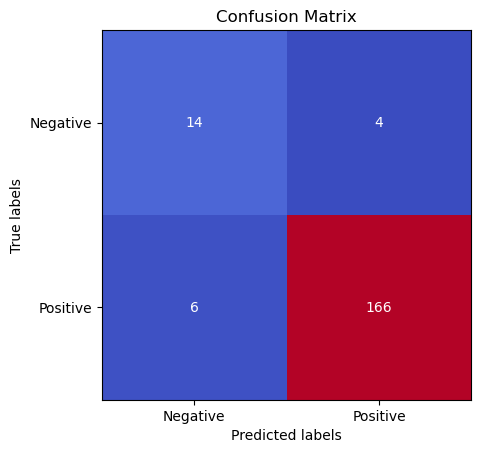

In [26]:
# plot confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

labels = ['Negative', 'Positive'] # define class labels

fig, ax = plt.subplots()
im = ax.imshow(confusion_mat, cmap='coolwarm')

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, confusion_mat[i, j], ha='center', va='center', color='white')
plt.show() 

In [27]:
#FINAL PREDICTION

#now bringing back the diabetes class = P to test the final model to predicit which all prediabetic might turn into diabetic

X = pre_data.drop(['CLASS'], axis=1) # feature data
Y = logreg.predict(X)
pre_data['Prediction'] = Y
pre_data 

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,Prediction
0,0,43,2.1,55,5.7,4.7,5.3,0.90,1.70,2.4,25.0,P,1
1,0,49,3.3,44,6.0,5.6,1.9,0.75,1.35,0.8,21.0,P,1
2,0,49,3.3,44,6.0,5.6,1.9,0.75,1.35,0.8,23.0,P,1
3,0,49,3.3,44,6.0,5.6,1.9,0.75,1.35,0.8,23.0,P,1
4,0,39,3.0,38,6.4,4.7,1.3,1.10,3.10,0.6,22.0,P,1
5,0,39,3.0,46,6.4,4.7,1.3,1.10,3.10,0.6,24.0,P,1
6,0,39,3.0,38,6.4,4.7,1.3,1.10,3.10,0.6,22.0,P,1
7,0,30,5.7,53,6.0,5.4,1.7,1.40,3.30,0.7,22.0,P,0
8,0,33,2.7,47,6.0,4.2,1.4,1.30,2.60,0.7,24.0,P,1
9,0,30,5.7,53,6.0,5.4,1.7,1.40,3.30,0.7,22.0,P,0
